データサイエンス特別PG データサイエンス特論 第13回 主成分分析

In [1]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds07_temp_power_exercise.xlsx
# ! pip install japanize-matplotlib

# 下記を参考に作成
# https://santakalog.com/2021/02/13/python-pca/

In [2]:
# ライブラリをインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import openpyxl
import pandas as pd
import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
weather_df = pd.read_excel('ds07_temp_power_exercise.xlsx', 
                           sheet_name='2020熊谷市気象データ_data', skiprows=[0,1,2],
                           names=['年月日', '平均気温', '', '', '最高気温', '', '', '', '', '最低気温', '', '', '', '', 
                           '降水量', '', '', '', '日照時間', '', '', '', '降雪量', '', '', '', '平均風速', '', '', 
                           '平均蒸気圧', '', '', '平均湿度', '', '', '平均現地気圧', '', '', '', '', '', '天気概況', '', ''])

year = 2020
month = 1
data = ['平均気温', '最高気温', '最低気温', '降水量', '日照時間', '降雪量', '平均風速', '平均蒸気圧', '平均湿度', '平均現地気圧'] 
target = '天気概況'
weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                        & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][data].values
weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                            & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][target].values
# データを標準化
stdsc = StandardScaler()
weather_data = stdsc.fit_transform(weather_data)

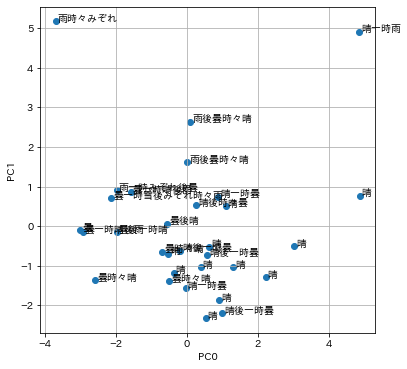

In [4]:
#主成分分析を実行
pca = PCA()
pca.fit(weather_data)

# データを主成分空間に写像
pca_cor = pca.transform(weather_data)

# 第一主成分と第二主成分で各日を天気概況付きでプロット
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca_cor[:, 0], pca_cor[:, 1], weather_target):
    plt.text(x+0.05, y, name)
plt.scatter(pca_cor[:, 0], pca_cor[:, 1])
plt.grid()
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show()

In [5]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=data, 
             index=["PC{}".format(x) for x in range(len(data))])

,平均気温,最高気温,最低気温,降水量,日照時間,降雪量,平均風速,平均蒸気圧,平均湿度,平均現地気圧
PC0,0.470413,0.443743,0.338544,0.061929,0.377564,-0.170985,0.319183,0.078188,-0.262611,-0.338542
PC1,0.132000,0.071000,0.162720,0.461047,-0.204723,0.318433,-0.157960,0.542114,0.463175,-0.248622
PC2,-0.070613,-0.259849,0.162508,0.369111,-0.016341,0.544663,0.595646,-0.231835,-0.189569,0.153093
PC3,0.048001,-0.287805,0.660603,-0.177539,-0.542080,-0.361676,0.132400,0.053779,-0.011276,0.041692
PC4,-0.249276,-0.237221,-0.058855,-0.354184,0.020556,0.142476,0.185354,-0.122119,0.163133,-0.809984
PC5,-0.243647,-0.199005,-0.251001,0.588770,0.056896,-0.637774,0.232971,0.021123,0.034756,-0.159562
PC6,-0.137430,-0.020445,-0.007047,-0.340799,0.337761,-0.086681,0.496889,0.409389,0.463838,0.336544
PC7,-0.389219,-0.142932,0.561519,0.142469,0.566555,0.009798,-0.377206,-0.142150,0.090150,0.027917
PC8,0.504381,-0.727081,-0.119503,-0.047547,0.285330,0.009446,-0.150988,0.253398,-0.178167,-0.012546
PC9,0.455759,-0.048238,0.002337,0.070992,0.035728,-0.084513,0.015362,-0.613175,0.630559,0.051652


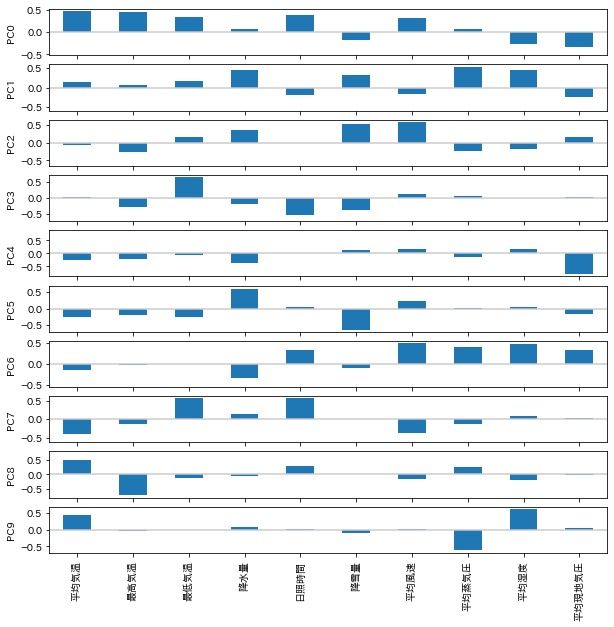

In [6]:
# 固有ベクトルを棒グラフで表示
centers = pd.DataFrame(pca.components_, columns=data)
f, axes = plt.subplots(len(data), 1, sharex=True, figsize=(10,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'PC{i}')
    ax.set_ylim(-maxPC, maxPC)

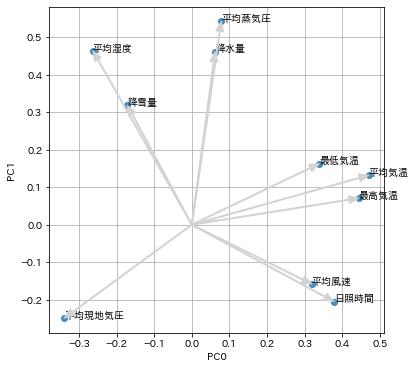

In [7]:
# 第一主成分と第二主成分における観測変数をプロット
plt.figure(figsize=(6, 6))
origin =(0,0)
for x, y, name in zip(pca.components_[0], pca.components_[1], data):
    plt.text(x, y, name)
    plt.annotate(text='', xy=(x,y), xytext=origin,
                 arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                 connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show()

In [8]:
# 寄与率
for i in range(len(data)):
    print(f'PC{i} {pca.explained_variance_ratio_[i]:.06f}')

PC0 0.394890
PC1 0.296549
PC2 0.120754
PC3 0.090043
PC4 0.047387
PC5 0.023860
PC6 0.015185
PC7 0.008567
PC8 0.002540
PC9 0.000226


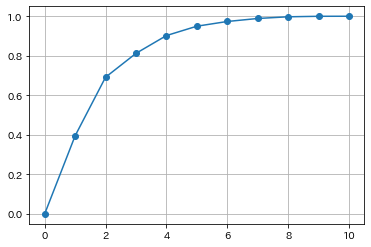

In [9]:
# 累積寄与率
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.grid()
plt.show()